## Result of staurosporine 

### Import package

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from core.core import *

### Kinase identification result

In [2]:
# result paths
paths = [
    'results/PL_293T_F_scores.csv',
    'results/PL_HepG2_F_scores.csv',
    'results/PL_K562_F_scores.csv',
    'results/PL_HCT116_F_scores.csv',
    'results/PL_MCF7_F_scores.csv'
]

In [3]:
# Kinase and ATP binding proteins
kins = pd.read_csv('data/UniprotID_family-Kinase.txt', sep = '\t')
kins = kins['ID'].values
atpb = pd.read_csv('data/UniprotID_ATPbinding.txt', sep = '\t')
atpb = atpb['ID'].values
tars = np.union1d(kins, atpb)
print(len(tars))

2428


In [4]:
# Here x is the cell type, y1 is the number of true positive, y2 is the number of false positive
x, y1, y2 = [], [], []
idkins = {}
falpos = {}
for f in paths:
    cel = f.split('_')[1]
    tab = pd.read_csv(f)
    sig = tab[tab['Staurosporine'] >= 0.15]['Accession'].values
    trues = np.intersect1d(sig, tars)
    falses = np.setdiff1d(sig, tars)
    idkins[cel] = list(trues)
    falpos[cel] = list(falses)
    x.append(cel)
    y1.append(len(trues))
    y2.append(len(falses))

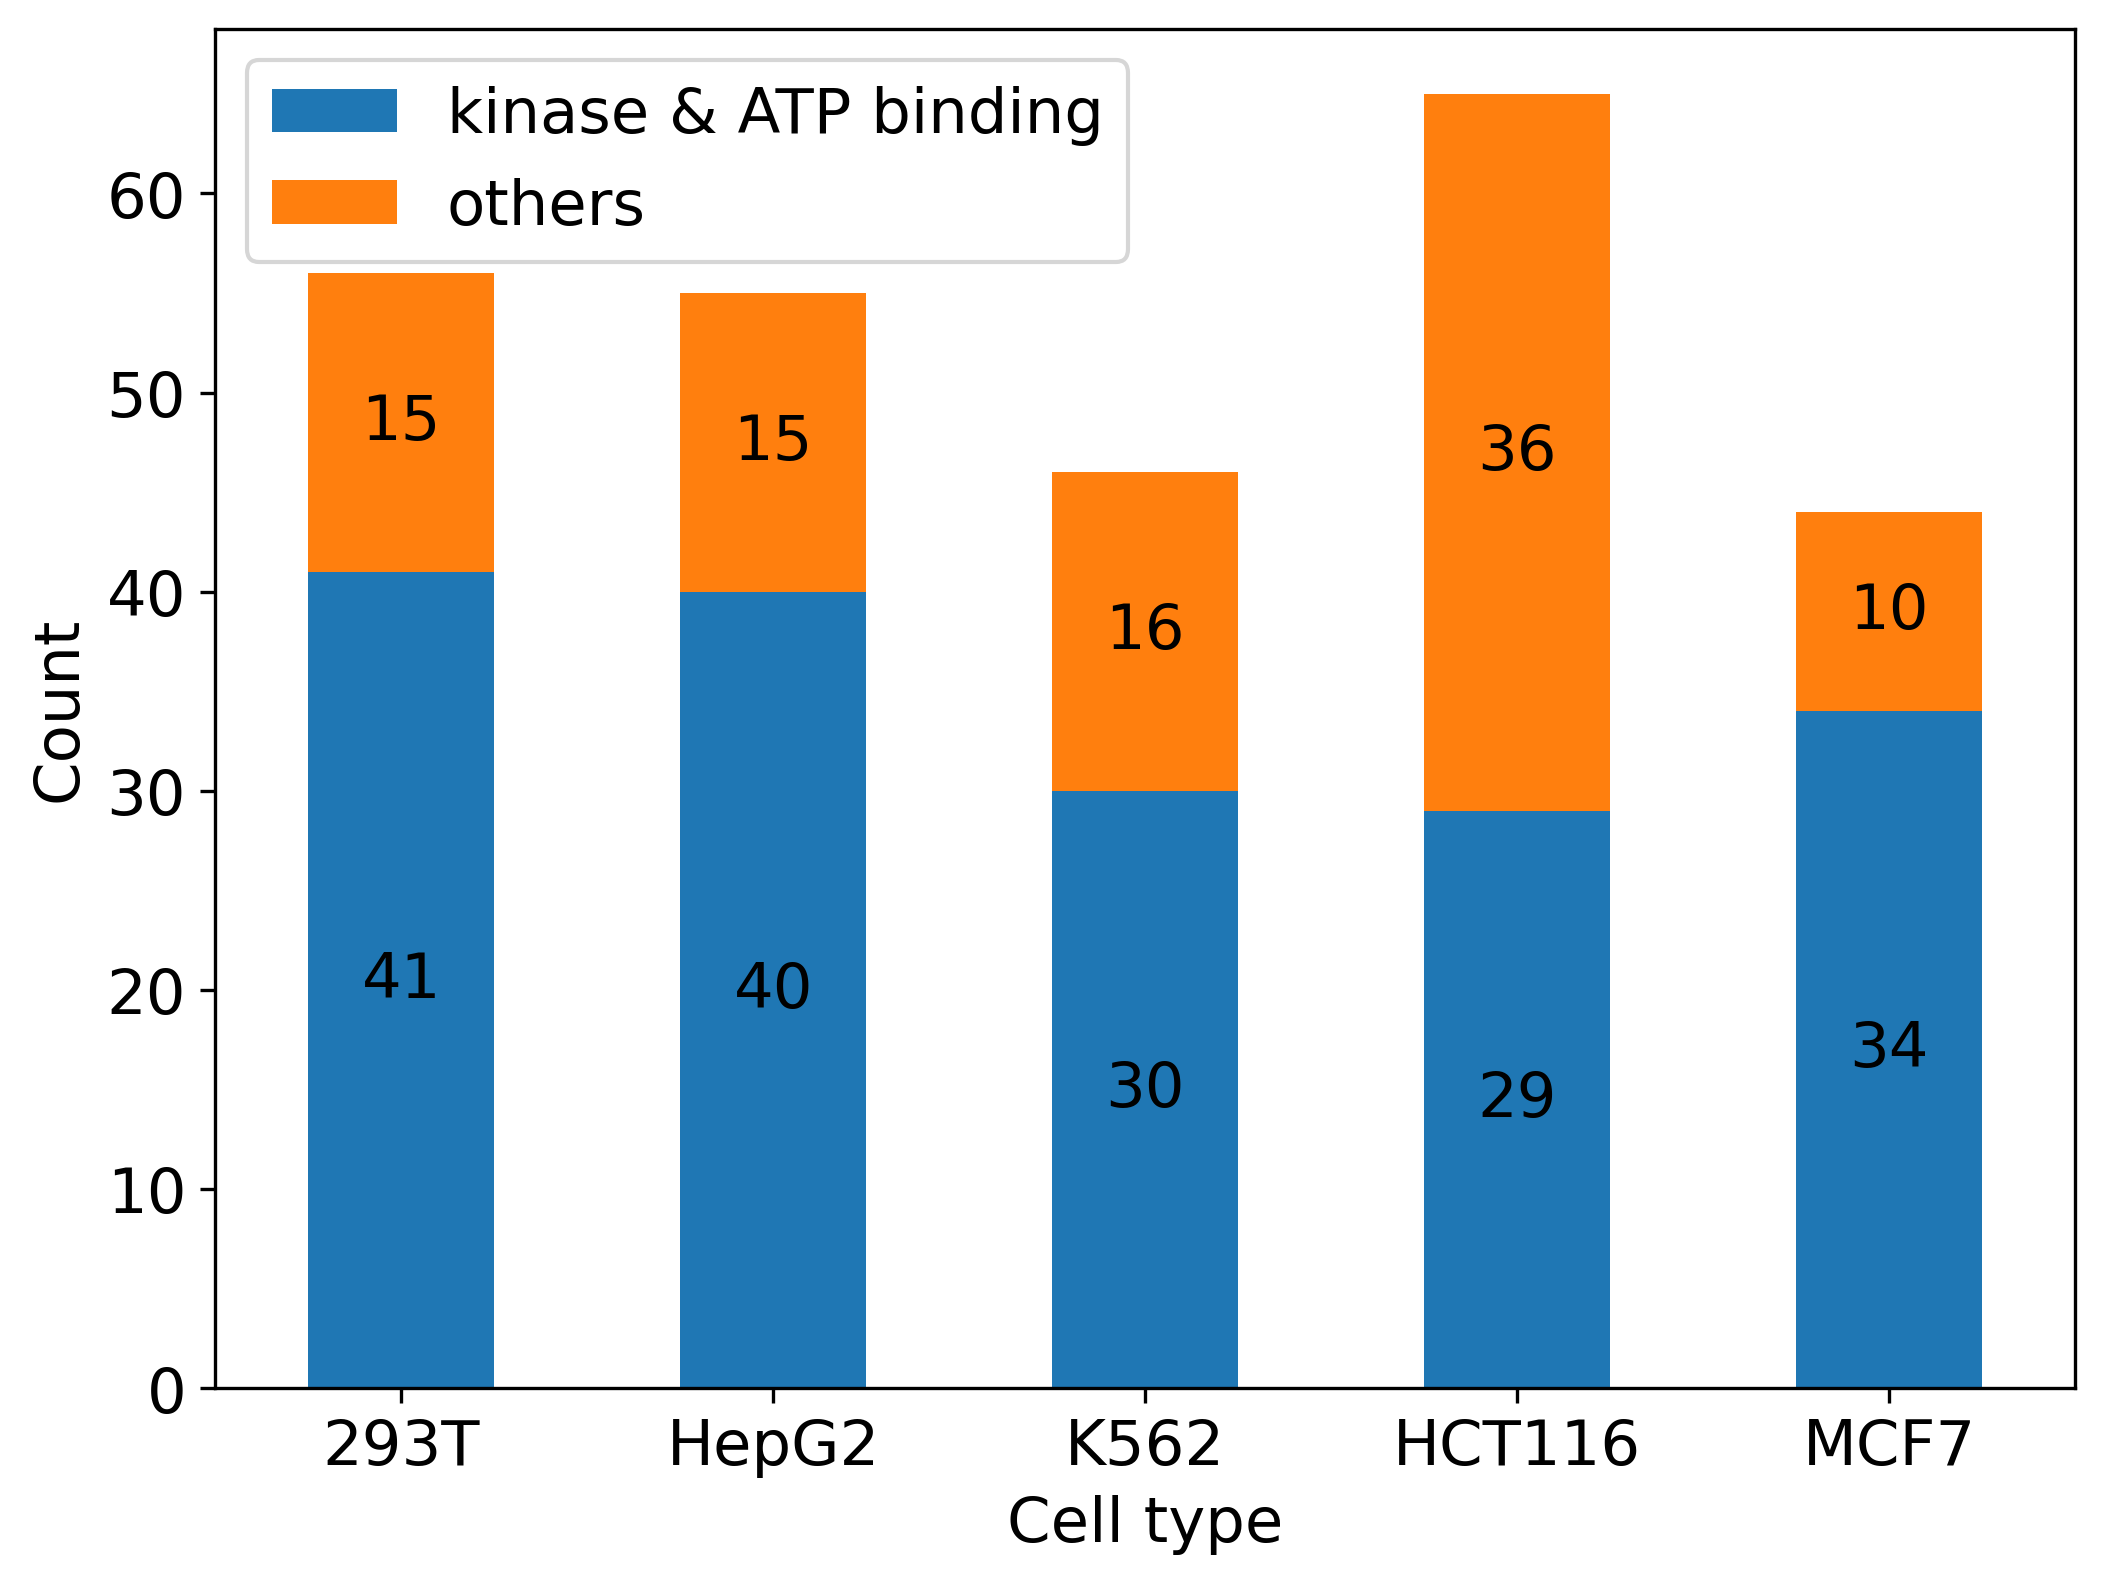

In [5]:
# bar plot
df = pd.DataFrame(data={'kinase & ATP binding': y1, 'others': y2})
df.index = x

plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 15
ax = df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0, xlabel='Cell type', ylabel='Count')
for c in ax.containers:
    labels = np.round([v.get_height() if v.get_height() > 0 else '' for v in c]).astype(int)
    ax.bar_label(c, labels=labels, label_type='center')

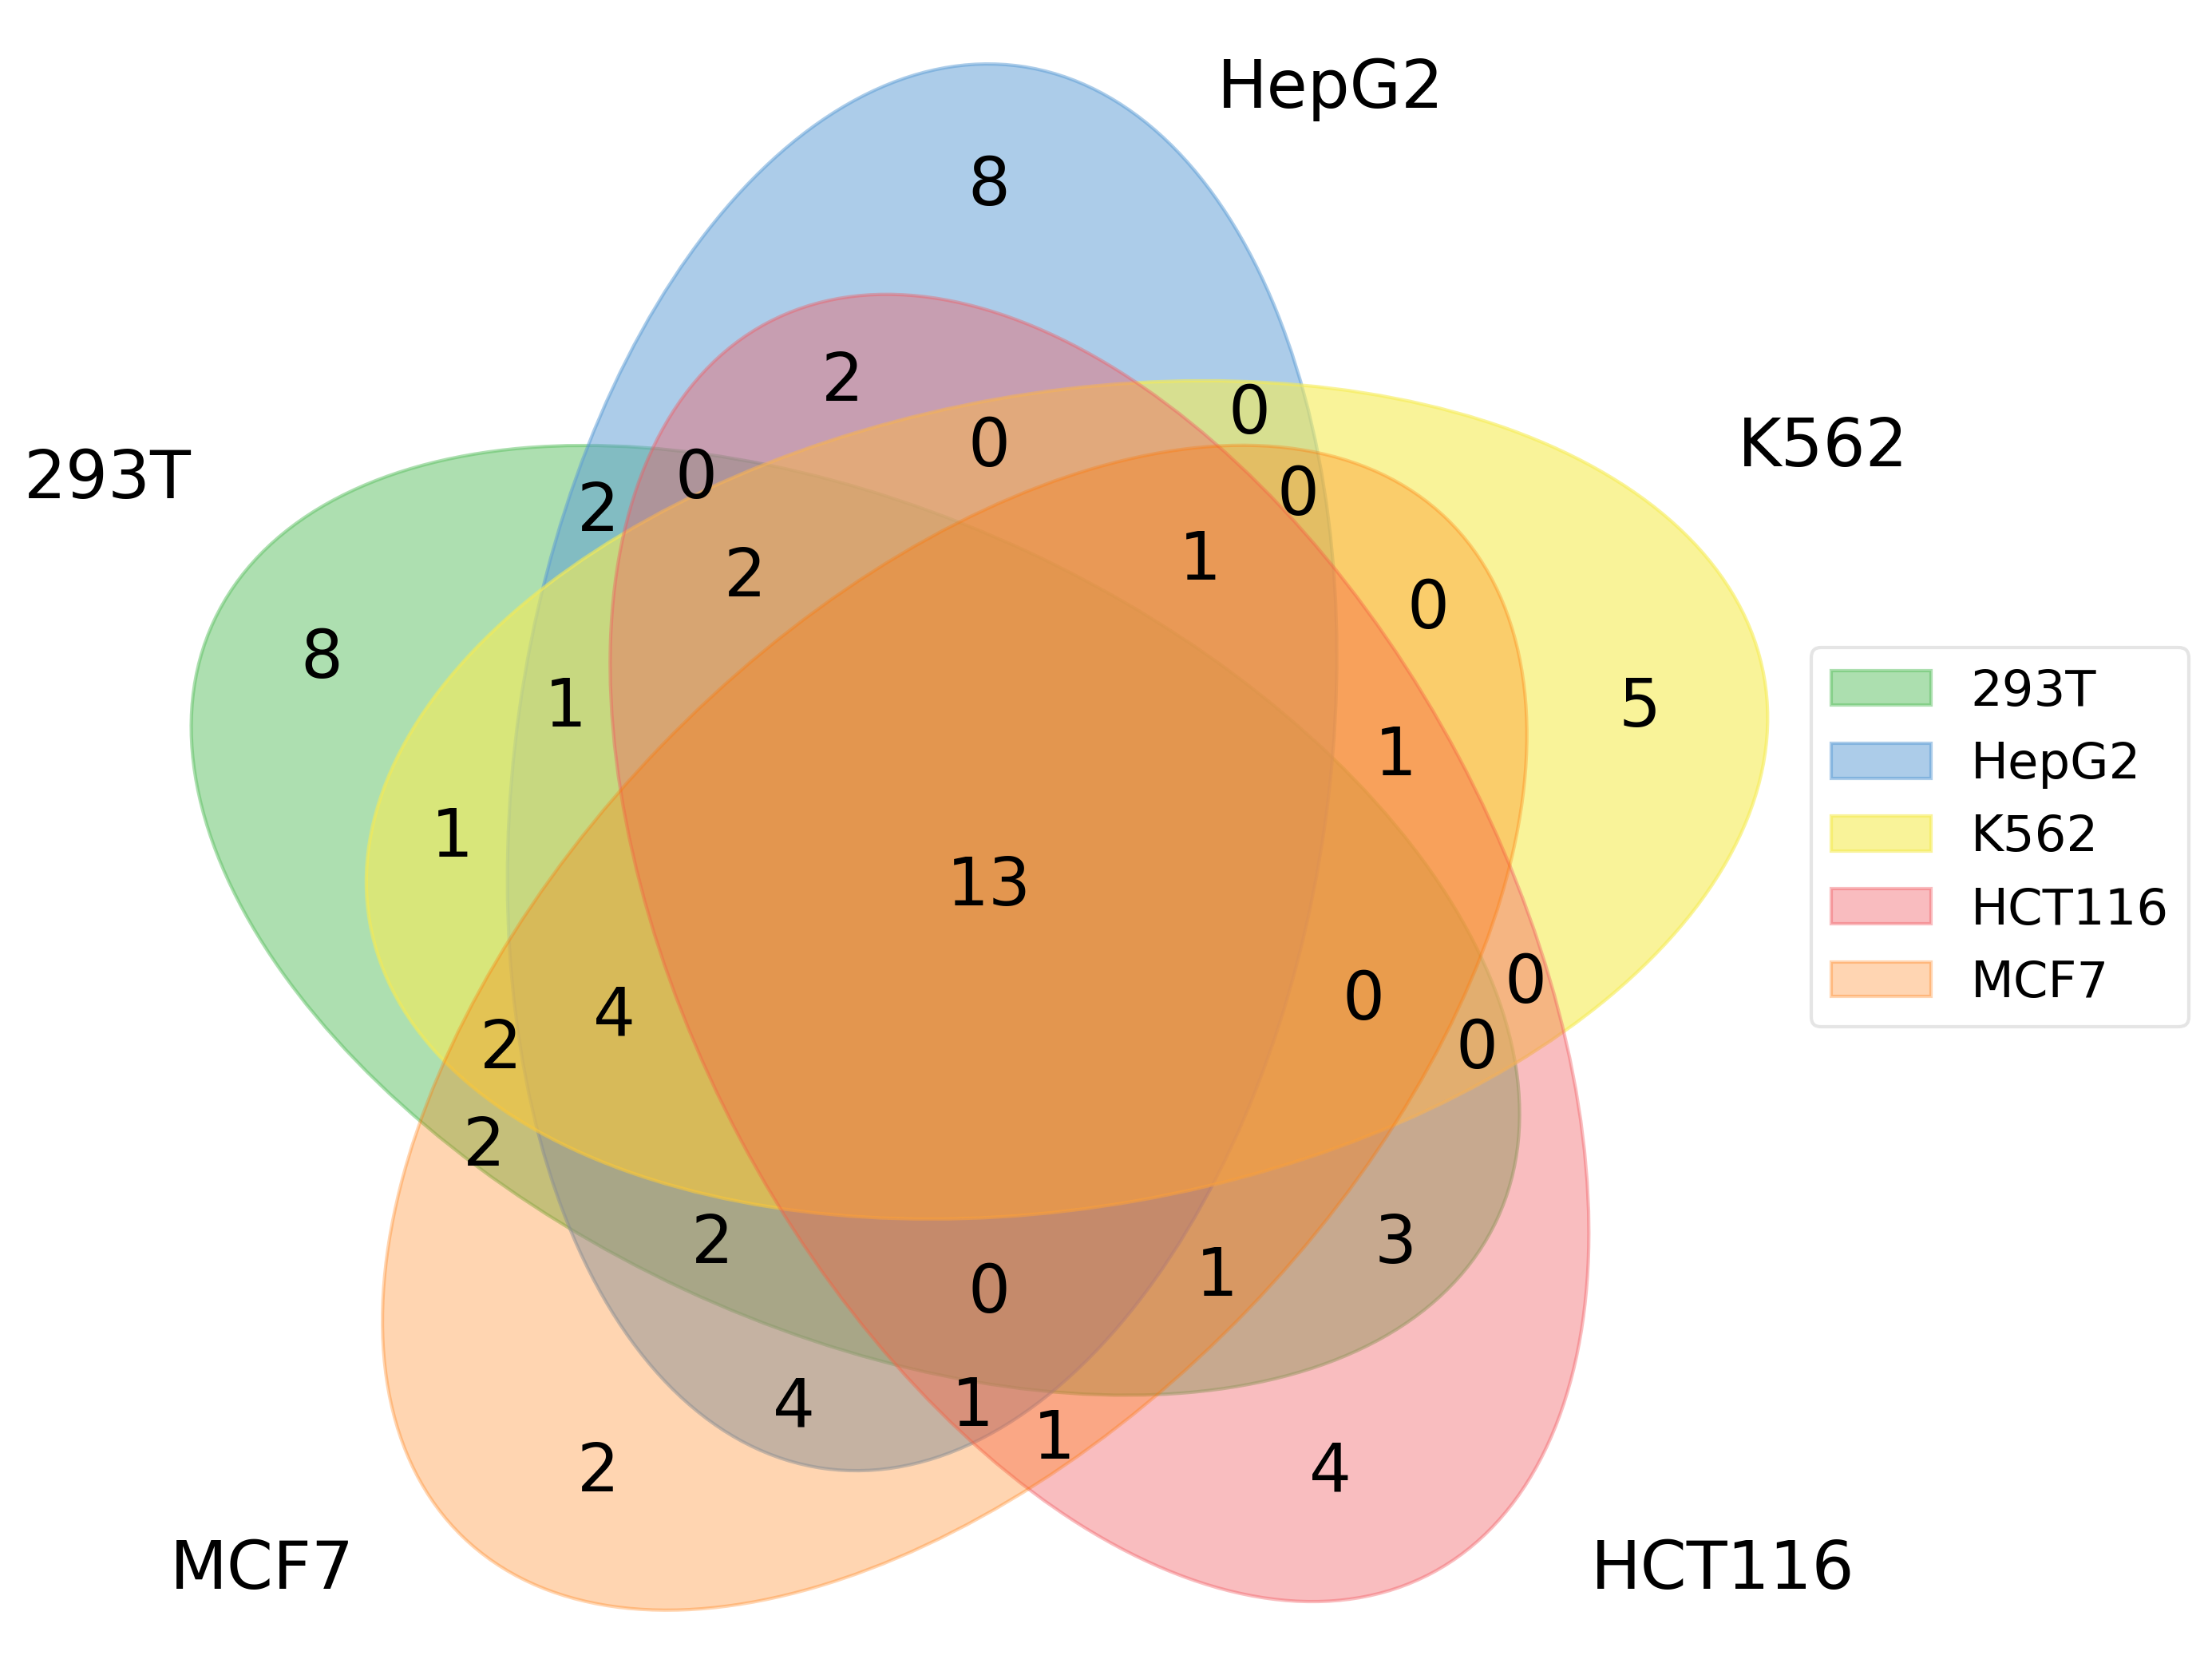

In [6]:
# venn plot
from core import venn

labels = venn.get_labels([ idkins[k] for k in idkins.keys()], fill=['number'])
fig, ax = venn.venn5(labels, names = list(idkins.keys()))
fig.show()

In [8]:
# compare 293T and HepG2
comm = set(idkins['293T']) & set(idkins['HepG2'])
C293T = set(idkins['293T']) - comm
HepG2 = set(idkins['HepG2']) - comm